![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_apple_twitter.ipynb)



# Training a Sentiment Analysis Classifier with NLU 
## 2 class Apple Tweets sentiment classifier training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:

<br>

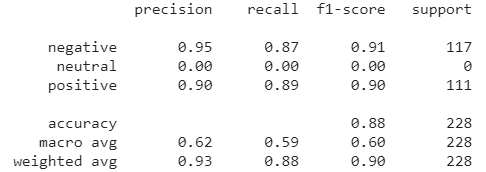

You can achieve these results or even better on this dataset with test data:



<br>


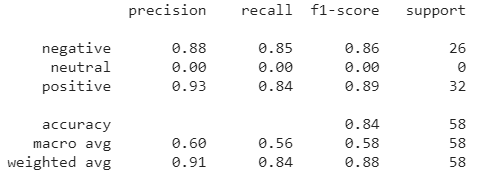



In [ ]:
import os
from sklearn.metrics import classification_report
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! pip install nlu pyspark==2.4.7 > /dev/null  


import nlu

# 2. Download appple twitter  Sentiment dataset 
https://www.kaggle.com/seriousran/appletwittersentimenttexts

this dataset contains tweets made towards apple and today we are going to train our model to predict whether the tweet contains sentiment!


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/01/apple-twitter-sentiment-texts.csv


--2021-03-01 01:41:31--  http://ckl-it.de/wp-content/uploads/2021/01/apple-twitter-sentiment-texts.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31678 (31K) [text/csv]
Saving to: ‘apple-twitter-sentiment-texts.csv’

apple-twitter-senti 100%[===================>]  30.94K   149KB/s    in 0.2s    

2021-03-01 01:41:31 (149 KB/s) - ‘apple-twitter-sentiment-texts.csv’ saved [31678/31678]



In [ ]:
import pandas as pd
train_path = '/content/apple-twitter-sentiment-texts.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
columns=['text','y']
train_df = train_df[columns]
train_df = train_df[~train_df["y"].isin(["neuteral"])]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
194,@fullcircleone ThanX! Big @Apple ThanX goes 2 ...,positive
279,Can't believe @Apple said melted keys on Mac P...,negative
259,@apple had a dream last night where I downgrad...,negative
148,RT @paisley_smithh: Real tired of my charger b...,negative
158,@OneRepublic @Apple THIS IS SO BEAUTIFUL,positive
...,...,...
79,7 awesome paid #iPhone and #iPad apps that are...,positive
166,@apple is laughing its pants off with the scho...,negative
276,"@jimmymujaj @Apple it works again fucker, not ...",negative
131,@apple Why is your NYC Grand Central store so ...,negative


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.94      0.59      0.73        27
     neutral       0.00      0.00      0.00         0
    positive       0.95      0.87      0.91        23

    accuracy                           0.72        50
   macro avg       0.63      0.49      0.55        50
weighted avg       0.95      0.72      0.81        50



,default_name_embeddings,sentiment,text,sentiment_confidence,y,document
origin_index,,,,,,
194,"[0.0020813194569200277, -0.025028454139828682,...",positive,@fullcircleone ThanX! Big @Apple ThanX goes 2 ...,0.843989,positive,@fullcircleone ThanX! Big @Apple ThanX goes 2 ...
279,"[0.05548453330993652, 0.06619943678379059, -0....",negative,Can't believe @Apple said melted keys on Mac P...,0.682702,negative,Can't believe @Apple said melted keys on Mac P...
259,"[0.06910835206508636, -0.052032221108675, -0.0...",negative,@apple had a dream last night where I downgrad...,0.657026,negative,@apple had a dream last night where I downgrad...
148,"[0.059678513556718826, 0.06913778185844421, -0...",neutral,RT @paisley_smithh: Real tired of my charger b...,0.590428,negative,RT @paisley_smithh: Real tired of my charger b...
158,"[0.011856582947075367, 0.016805896535515785, -...",positive,@OneRepublic @Apple THIS IS SO BEAUTIFUL,0.708730,positive,@OneRepublic @Apple THIS IS SO BEAUTIFUL
224,"[0.023869305849075317, -0.033373694866895676, ...",positive,@stevewoz @Outback Personally I am excited abo...,0.614970,positive,@stevewoz @Outback Personally I am excited abo...
142,"[0.008206114172935486, 0.0042152707464993, -0....",neutral,These Damn @Apple Commercials Are Getting Wors...,0.563933,negative,These Damn @Apple Commercials Are Getting Wors...
23,"[0.044899821281433105, 0.033001091331243515, 0...",positive,Thanks @Apple store @RobinaTC for helping me o...,0.815056,positive,Thanks @Apple store @RobinaTC for helping me o...
24,"[0.06401650607585907, 0.02939487248659134, -0....",positive,#iPhone5s is the best mobile that I have had. ...,0.772757,positive,#iPhone5s is the best mobile that I have had. ...


#4.  Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict('I hate the newest update')

,default_name_embeddings,sentiment,sentiment_confidence,document
origin_index,,,,
0,"[-0.023322951048612595, -0.04157407209277153, ...",negative,0.604448,I hate the newest update


##5.  Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(2)                 | Info: Maximum number of epochs to train | Currently set to : 2
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

##6.  Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:100])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.92      0.92      0.92        49
     neutral       0.00      0.00      0.00         0
    positive       0.96      0.88      0.92        51

    accuracy                           0.90       100
   macro avg       0.63      0.60      0.61       100
weighted avg       0.94      0.90      0.92       100



,default_name_embeddings,sentiment,text,sentiment_confidence,y,document
origin_index,,,,,,
194,"[0.0020813194569200277, -0.025028454139828682,...",positive,@fullcircleone ThanX! Big @Apple ThanX goes 2 ...,0.997639,positive,@fullcircleone ThanX! Big @Apple ThanX goes 2 ...
279,"[0.05548453330993652, 0.06619943678379059, -0....",negative,Can't believe @Apple said melted keys on Mac P...,0.951257,negative,Can't believe @Apple said melted keys on Mac P...
259,"[0.06910835206508636, -0.052032221108675, -0.0...",negative,@apple had a dream last night where I downgrad...,0.957475,negative,@apple had a dream last night where I downgrad...
148,"[0.059678513556718826, 0.06913778185844421, -0...",negative,RT @paisley_smithh: Real tired of my charger b...,0.748118,negative,RT @paisley_smithh: Real tired of my charger b...
158,"[0.011856582947075367, 0.016805896535515785, -...",positive,@OneRepublic @Apple THIS IS SO BEAUTIFUL,0.992686,positive,@OneRepublic @Apple THIS IS SO BEAUTIFUL
...,...,...,...,...,...,...
12,"[0.06702571362257004, -0.04291766509413719, -0...",positive,#AAPL providing another great entry point &lt;...,0.998947,positive,#AAPL providing another great entry point &lt;...
277,"[0.01444460079073906, -0.020860610529780388, -...",negative,@apple fucking let everyone name the group cha...,0.953368,negative,@apple fucking let everyone name the group cha...
121,"[0.013054611161351204, 0.04479760676622391, -0...",positive,Great service at @Apple #BethesdaRow thanks Je...,0.993416,positive,Great service at @Apple #BethesdaRow thanks Je...


#7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(110)  
trainable_pipe['sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.95      0.87      0.91       117
     neutral       0.00      0.00      0.00         0
    positive       0.90      0.89      0.90       111

    accuracy                           0.88       228
   macro avg       0.62      0.59      0.60       228
weighted avg       0.93      0.88      0.90       228



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.88      0.85      0.86        26
     neutral       0.00      0.00      0.00         0
    positive       0.93      0.84      0.89        32

    accuracy                           0.84        58
   macro avg       0.60      0.56      0.58        58
weighted avg       0.91      0.84      0.88        58



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('I hate the newest update')
preds

Fitting on empty Dataframe, could not infer correct training method!


,sentiment_confidence,en_embed_sentence_small_bert_L12_768_embeddings,document,sentiment
origin_index,,,,
0,0.974083,"[-0.058236218988895416, -0.3061041235923767, 0...",I hate it,negative


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')            | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['regex_tokenizer'] has settable params:
pipe['regex_tokenizer'].setCaseSensitiveExceptions(True)       | Info: Whether to care for case sensitiveness in exceptions | Currently set to : True
pipe['regex_tokenizer'].setTargetPattern('\S+')                | Info: pattern to grab from text as token candidates. Defaults \S+ | Currently set to : \S+
pipe['regex_tokenizer'].setMaxLength(99999)                    | Info: Set the maximum allowed length for each token | Currently set to : 99999
pipe['regex_tokenizer'].setMinLength(0)                        | Info: Set the minimum allowed length for each token | Currently set to : 0
>>> pipe['